# Bibliotecas

In [2]:
import pandas as pd
from charset_normalizer import detect
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import gc
import plotly.express as px


# Lendo os arquivos de dados

A seguir, o código lerá todos os arquivos de dados (*.csv*) extraídos do __*INMET*__ e adicionará os dados à um Dataframe único (*df*)

In [67]:
data_path = './data/'
results_path = './output/results/'

files = os.listdir(data_path)

In [65]:
columns = [
    "DATA (YYYY-MM-DD)",
    "HORA (UTC)",
    "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",
    "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",
    "PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)",
    "PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)",
    "RADIACAO GLOBAL (KJ/m²)",
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
    "TEMPERATURA DO PONTO DE ORVALHO (°C)",
    "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)",
    "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)",
    "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)",
    "UMIDADE RELATIVA DO AR, HORARIA (%)",
    "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
    "VENTO, RAJADA MAXIMA (m/s)",
    "VENTO, VELOCIDADE HORARIA (m/s)"
]

ages_list = [i for i in range(2000, 2025, 1)]

ages_list


[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [75]:
# Repository size
age_size_list = []

total_size = 0

for age in ages_list:
    files = os.listdir(data_path + str(age))
    read_size = 0
    for file in files:
        read_size += os.path.getsize(data_path + str(age) + "/" + file) / (1024 ** 2)
    age_size_list.append({age: read_size})
    total_size += read_size

print(f"Total size of the files: {total_size:.2f} MB")

for age_size in age_size_list:
    age = list(age_size.keys())[0]
    size = age_size[age]
    print(f"Age: {age}, Size: {size:.2f} MB")


Total size of the files: 6785.95 MB
Age: 2000, Size: 2.38 MB
Age: 2001, Size: 6.37 MB
Age: 2002, Size: 15.15 MB
Age: 2003, Size: 43.19 MB
Age: 2004, Size: 47.32 MB
Age: 2005, Size: 52.67 MB
Age: 2006, Size: 70.49 MB
Age: 2007, Size: 162.95 MB
Age: 2008, Size: 282.28 MB
Age: 2009, Size: 337.64 MB
Age: 2010, Size: 348.34 MB
Age: 2011, Size: 358.49 MB
Age: 2012, Size: 363.25 MB
Age: 2013, Size: 370.25 MB
Age: 2014, Size: 375.85 MB
Age: 2015, Size: 382.24 MB
Age: 2016, Size: 398.35 MB
Age: 2017, Size: 437.01 MB
Age: 2018, Size: 469.10 MB
Age: 2019, Size: 425.90 MB
Age: 2020, Size: 393.46 MB
Age: 2021, Size: 337.44 MB
Age: 2022, Size: 354.67 MB
Age: 2023, Size: 396.31 MB
Age: 2024, Size: 354.84 MB


In [6]:
def generate_csv(ages_list, data_path, columns):

    error_files = []
    read_size = 0
    df_list = []

    for age in ages_list:
        read_size = 0
        files = os.listdir(data_path + str(age))
        for file in files:
            try:
                # Ler o arquivo atual
                df_aux = pd.read_csv(
                    data_path + str(age) + "/" + file,
                    skiprows=8,
                    sep=';',
                    usecols=columns,
                    encoding="Windows-1252"
                )

                df_list.append(df_aux)

                # Atualizar tamanho total lido
                read_size += os.path.getsize(data_path + str(age) + "/" + file)

            except Exception as e:
                # print(f"Error while reading {file} - {e}")
                error_files.append({file: str(e)})
        
        print(f'============== {age} =============\nFiles Count: {len(files)}\nRead Size: {read_size / (1024**2):.2f} MB')
        print(f"\nError files: {len(error_files)}")

        try:
            pd.concat(df_list, ignore_index=True).to_csv(f"./output/{age}/" + str(age)  +".csv", index=False)
            df_list.clear()
        except:
            print("No object to concatenate")
        
        error_output = open(f"./output/{age}/error_log.txt", "w")
        error_output.write(str(error_files))
        error_output.close()

        error_files.clear()



In [11]:
generate_csv(ages_list, data_path, columns)

============== 2019 =============
Files Count: 589
Read Size: 425.90 MB

Error files: 0


In [10]:
# Os arquivos de 2020 para frente possuem uma diferença no nome do campo relacionado à radiação global.
# Característica que gerou erro na leitura dos arquivos.
# Como são muitos arquivos, é inviável trocar na mão, um por um, dessa forma, executarei o código anterior
# com estes novos parâsmetros (utilizados apenas para gerar os arquivos de dados necessários)

columns = [
    "Data",
    "Hora UTC",
    "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",
    "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",
    "PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)",
    "PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)",
    "RADIACAO GLOBAL (Kj/m²)",
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
    "TEMPERATURA DO PONTO DE ORVALHO (°C)",
    "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)",
    "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)",
    "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)",
    "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)",
    "UMIDADE RELATIVA DO AR, HORARIA (%)",
    "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
    "VENTO, RAJADA MAXIMA (m/s)",
    "VENTO, VELOCIDADE HORARIA (m/s)"
]

ages_list = [i for i in range(2019, 2025, 1)]


In [35]:
generate_csv(ages_list, data_path, columns)

============== 2020 =============
Files Count: 589
Read Size: 393.46 MB

Error files: 0
============== 2021 =============
Files Count: 588
Read Size: 337.44 MB

Error files: 0
============== 2022 =============
Files Count: 567
Read Size: 354.67 MB

Error files: 0
============== 2023 =============
Files Count: 567
Read Size: 396.31 MB

Error files: 0
============== 2024 =============
Files Count: 565
Read Size: 354.84 MB

Error files: 0


In [30]:

required_columns = [
    "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",
    "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",
    "RADIACAO GLOBAL (KJ/m²)",
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
    "TEMPERATURA DO PONTO DE ORVALHO (°C)",
    "UMIDADE RELATIVA DO AR, HORARIA (%)",
    "VENTO, VELOCIDADE HORARIA (m/s)"
]

In [13]:
df = pd.DataFrame(columns=required_columns)
df_list = []
for age in ages_list:
   print(f"Reading: {age}.csv")
   try:
      df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")
      df_list.append(df_aux)

      df_aux = 0
   except Exception as e:
      print(str(e))

try:
   df = pd.concat(df_list, ignore_index=True)
except Exception  as e:
   print("Error while concatenating")

df_list.clear()

Reading: 2000.csv
Reading: 2001.csv
Reading: 2002.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2003.csv
Reading: 2004.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2005.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2006.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2007.csv
Reading: 2008.csv
Reading: 2009.csv
Reading: 2010.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2011.csv
Reading: 2012.csv
Reading: 2013.csv
Reading: 2014.csv
Reading: 2015.csv
Reading: 2016.csv
Reading: 2017.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (2,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2018.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (2,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2019.csv
Reading: 2020.csv
Reading: 2021.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (2,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2022.csv


C:\Users\bemen\AppData\Local\Temp\ipykernel_2712\2662699100.py:6: DtypeWarning: Columns (2,3,6,7,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv("./output/" + str(age) + "/" + str(age) + ".csv", usecols=required_columns, encoding="utf-8")


Reading: 2023.csv
Reading: 2024.csv


In [ ]:
df.to_csv( results_path + "raw_df.csv", index=False)

# Escolha dos campos

- Campos desconsiderados:

Campos relacionados à data e hora foram desconsiderados visto que não influênciariam positivamente os modelos de ML, as medidas temporais, neste caso, não interferem na chance de chuva, estando relcionada apenas à uma marcação temporal feita pelo sensor.

Campos que continham informaçòes de minimos e máximos dentro de uma hora foram desconsiderados pois são informaçòes redundantes considerando que temos campos que apresentam a informação relativa dentro do período de tempo

O campo relacionado a direção do vento, assim como a rajada máxima, não condiz com a previsào que estamos fazendo, visto que não estamos trabalhando com informações geográficas/de satélite das nuvens. Dessa forma, essas informaçòes relacionadas ao vento se tornam sem valor.



# Analisando e tratando os dados

In [ ]:
df.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
0,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [25]:
df.tail()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
79623475,0,"899,3","1798,3","28,4","15,5",45.0,"1,7"
79623476,0,899,"1478,9","28,1","15,3",46.0,"1,9"
79623477,0,"898,9","907,4","27,9","14,8",45.0,",8"
79623478,0,"899,2","226,6","24,7","17,8",65.0,"1,5"
79623479,0,"899,5",NaN,"23,7","17,5",68.0,",8"


In [12]:
def check_null(df):
   print("Nulls Count\n========================\n")

   for i in df.columns:
      print(i, ": ", df[i].isnull().sum())

In [11]:
def check_types(df):
   print("Verifying Types\n========================\n")

   for i in df.columns:
      print(i, ": ", df[i].dtype)

In [18]:
# Função eficiente para converter strings com vírgulas
def convert_to_float(valor):
    if isinstance(valor, str):
        return float(valor.replace('.', '').replace(',', '.'))
    return valor

In [8]:
def opt_types(df):
    for col in df.select_dtypes(include=['int', 'float']):
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df


### Otimizando o tipo dos dados

In [ ]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].apply(convert_to_float)
df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] = df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].apply(convert_to_float)
df['RADIACAO GLOBAL (KJ/m²)'] = df['RADIACAO GLOBAL (KJ/m²)'].apply(convert_to_float)
df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] = df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].apply(convert_to_float)
df['TEMPERATURA DO PONTO DE ORVALHO (°C)'] = df['TEMPERATURA DO PONTO DE ORVALHO (°C)'].apply(convert_to_float)
df['UMIDADE RELATIVA DO AR, HORARIA (%)'] = df['UMIDADE RELATIVA DO AR, HORARIA (%)'].apply(convert_to_float)
df['VENTO, VELOCIDADE HORARIA (m/s)'] = df['VENTO, VELOCIDADE HORARIA (m/s)'].apply(convert_to_float)


In [9]:
df = opt_types(df)

In [12]:
check_types(df)

Verifying Types

PRECIPITAÇÃO TOTAL, HORÁRIO (mm) :  float32
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB) :  float32
RADIACAO GLOBAL (KJ/m²) :  float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C) :  float32
TEMPERATURA DO PONTO DE ORVALHO (°C) :  float32
UMIDADE RELATIVA DO AR, HORARIA (%) :  float32
VENTO, VELOCIDADE HORARIA (m/s) :  float32


### Removendo linhas completamente vazias - Step 1

In [45]:
check_null(df)

Nulls Count

PRECIPITAÇÃO TOTAL, HORÁRIO (mm) :  8919494
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB) :  6993039
RADIACAO GLOBAL (KJ/m²) :  17589394
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C) :  7037007
TEMPERATURA DO PONTO DE ORVALHO (°C) :  8117713
UMIDADE RELATIVA DO AR, HORARIA (%) :  8057354
VENTO, VELOCIDADE HORARIA (m/s) :  8185613


In [15]:
df = df.dropna(how='all')

In [13]:
check_null(df)

Nulls Count

PRECIPITAÇÃO TOTAL, HORÁRIO (mm) :  1949322
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB) :  88403
RADIACAO GLOBAL (KJ/m²) :  9493942
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C) :  132371
TEMPERATURA DO PONTO DE ORVALHO (°C) :  1213077
UMIDADE RELATIVA DO AR, HORARIA (%) :  1152718
VENTO, VELOCIDADE HORARIA (m/s) :  1280977


In [42]:
print("Nulls Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {(df[col].isnull().sum()/df.shape[0] * 100):.2f}%")

Nulls Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 2.68%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 0.12%
RADIACAO GLOBAL (KJ/m²): 13.06%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.18%
TEMPERATURA DO PONTO DE ORVALHO (°C): 1.67%
UMIDADE RELATIVA DO AR, HORARIA (%): 1.59%
VENTO, VELOCIDADE HORARIA (m/s): 1.76%


### Valores inconsistentes - Step 2

Alguns campos podem possuir valores inconsistentes. Um exemplo é o campo _Precipitação Total Horário (mm)_, teoricamente, é impossível que haja uma quantidade negativa de chuva.

| Nome do Campo                                               | Pode ser Negativo? | Motivo                                                                                                                                                      |
|-------------------------------------------------------------|--------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| PRECIPITAÇÃO TOTAL, HORÁRIA (mm)                           | Não                | A precipitação representa a quantidade de chuva acumulada em milímetros. É uma medida física que não pode ser negativa.                                     |
| PRESSÃO ATMOSFÉRICA AO NÍVEL DA ESTAÇÃO, HORÁRIA (mB)       | Não                | A pressão atmosférica é sempre positiva, pois é causada pelo peso do ar acima da superfície terrestre.                                                     |
| RADIAÇÃO GLOBAL (KJ/m²)                                     | Não                | A radiação global mede a energia solar incidente em uma superfície. Como é uma energia acumulada, não pode ser negativa.                                    |
| TEMPERATURA DO AR - BULBO SECO, HORÁRIA (°C)                | Sim                | A temperatura do ar pode ser negativa em climas frios, especialmente durante o inverno ou em regiões de alta latitude/altitude.                            |
| TEMPERATURA DO PONTO DE ORVALHO (°C)                        | Sim                | A temperatura do ponto de orvalho pode ser negativa quando o ar está muito frio e contém pouca umidade.                                                    |
| UMIDADE RELATIVA DO AR, HORÁRIA (%)                         | Não                | A umidade relativa é uma porcentagem (entre 0 e 100) que mede a quantidade de vapor de água no ar em relação ao máximo possível. Valores negativos são fisicamente impossíveis. |
| VENTO, VELOCIDADE HORÁRIA (m/s)                             | Não                | A velocidade do vento é sempre uma magnitude positiva ou zero. Se houver vetores de direção, estes podem ser negativos, mas não a velocidade em si.         |


In [17]:
df.min()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                        -9999.0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   -9999.0
RADIACAO GLOBAL (KJ/m²)                                 -9999.0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)            -9999.0
TEMPERATURA DO PONTO DE ORVALHO (°C)                    -9999.0
UMIDADE RELATIVA DO AR, HORARIA (%)                     -9999.0
VENTO, VELOCIDADE HORARIA (m/s)                         -9999.0
dtype: float64

In [50]:
print("Negative Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {((df[col] < 0).sum()/df.shape[0] * 100):.2f}%")

Negative Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 8.15%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 6.23%
RADIACAO GLOBAL (KJ/m²): 33.87%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 6.02%
TEMPERATURA DO PONTO DE ORVALHO (°C): 7.12%
UMIDADE RELATIVA DO AR, HORARIA (%): 6.82%
VENTO, VELOCIDADE HORARIA (m/s): 7.25%


(array([ 4356082.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 68230391.]),
 array([-9999.        , -8994.59960938, -7990.20019531, -6985.79980469,
        -5981.39990234, -4977.        , -3972.59960938, -2968.19970703,
        -1963.79980469,  -959.39941406,    45.        ]),
 <BarContainer object of 10 artists>)

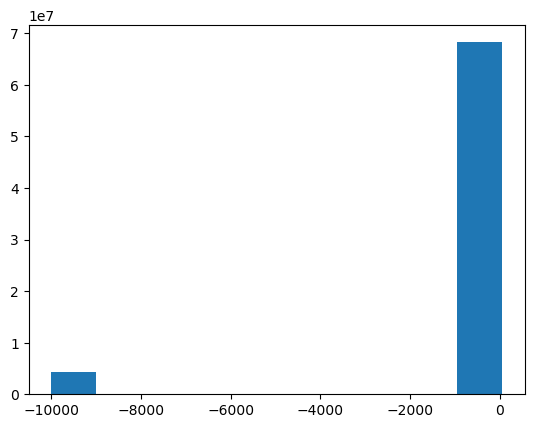

In [52]:
plt.hist(x = df["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"])

(array([ 4992029.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 66513738.]),
 array([-9999.        , -8994.59960938, -7990.20019531, -6985.79980469,
        -5981.39990234, -4977.        , -3972.59960938, -2968.19970703,
        -1963.79980469,  -959.39941406,    45.        ]),
 <BarContainer object of 10 artists>)

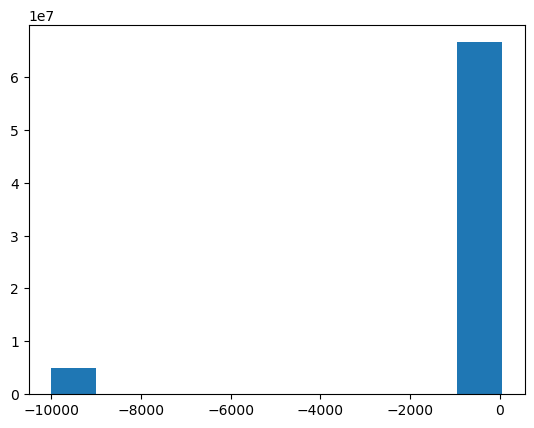

In [54]:
plt.hist(x=df["TEMPERATURA DO PONTO DE ORVALHO (°C)"])

In [19]:
df = df[~((df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] < 0) & (df['RADIACAO GLOBAL (KJ/m²)'] < 0) & (df['UMIDADE RELATIVA DO AR, HORARIA (%)'] < 0) & (df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] < 0) & (df['VENTO, VELOCIDADE HORARIA (m/s)'] < 0) & (df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] < -100) & (df['TEMPERATURA DO PONTO DE ORVALHO (°C)'] < -100))]

In [20]:
print("Negative Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {((df[col] < 0).sum()/df.shape[0] * 100):.2f}%")

Negative Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 2.39%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 0.35%
RADIACAO GLOBAL (KJ/m²): 29.73%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.13%
TEMPERATURA DO PONTO DE ORVALHO (°C): 1.31%
UMIDADE RELATIVA DO AR, HORARIA (%): 0.98%
VENTO, VELOCIDADE HORARIA (m/s): 1.44%


In [56]:
df.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
count,6.648404e+07,6.834496e+07,5.893942e+07,6.830099e+07,6.722028e+07,6.728064e+07,6.715238e+07
mean,-2.462282e+02,9.264696e+02,-2.496655e+03,1.304355e+01,-8.809978e+01,-2.866227e+01,-1.449079e+02
std,1.550137e+03,6.522114e+02,5.721229e+03,3.220998e+02,1.021484e+03,1.001432e+03,1.203160e+03
min,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
25%,0.000000e+00,9.391000e+02,-9.999000e+03,2.010000e+01,1.410000e+01,5.700000e+01,6.000000e-01
50%,0.000000e+00,9.699000e+02,2.052000e+02,2.360000e+01,1.800000e+01,7.600000e+01,1.700000e+00
75%,0.000000e+00,9.972000e+02,1.688000e+03,2.710000e+01,2.090000e+01,8.900000e+01,2.900000e+00
max,1.382000e+02,1.050000e+03,5.158800e+04,4.500000e+01,4.500000e+01,9.900000e+02,4.340000e+01


Os campos que possuem poucos valores inconsistentes irão ser preenchidos com a média.

Ao analisar o visualmente o campo _RADIACAO GLOBAL (KJ/m²)_ utilizando o Microsoft Excel foi possível observar um padrão na marcação. A radiação só era contabilizada entre os horários 09:00 e 22:00, nas amostras de dados mais recentes, o restante dos horários não era marcada, não possuindo dados nas linhas, em datasets mais antigos era posto valores negativos muito altos como -999 ou -9999 (isso também é válido para os outros campos). 

Além disso, os valores medidos crescem até certa do hora do dia e diminuem com o tempo, evidenciando um ciclo. Dessa forma, os valores negativos e faltantes serão preenchidos com 0, para manter a coerência com o restante da medição.

In [21]:
mean_pos_temperatura_bulbo = df[df["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"] >= -100]["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"].mean()
mean_pos_ponto_orvalho = df[df["TEMPERATURA DO PONTO DE ORVALHO (°C)"] >= -100]["TEMPERATURA DO PONTO DE ORVALHO (°C)"].mean()
mean_pos_precipitacao = df[df["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] > 0]["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].mean()
mean_pos_pressao = df[df["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)"] > 0]["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)"].mean()
mean_pos_umidade = df[df["UMIDADE RELATIVA DO AR, HORARIA (%)"] > 0]["UMIDADE RELATIVA DO AR, HORARIA (%)"].mean()
mean_pos_vento = df[df["VENTO, VELOCIDADE HORARIA (m/s)"] > 0]["VENTO, VELOCIDADE HORARIA (m/s)"].mean()

df.loc[df["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"] < -100, "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"] = mean_pos_temperatura_bulbo
df.loc[df["TEMPERATURA DO PONTO DE ORVALHO (°C)"] < -100, "TEMPERATURA DO PONTO DE ORVALHO (°C)"] = mean_pos_ponto_orvalho
df.loc[df["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] < 0, "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] = mean_pos_precipitacao
df.loc[df["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)"] < 0, "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)"] = mean_pos_pressao
df.loc[df["UMIDADE RELATIVA DO AR, HORARIA (%)"] < 0, "UMIDADE RELATIVA DO AR, HORARIA (%)"] = mean_pos_umidade
df.loc[df["VENTO, VELOCIDADE HORARIA (m/s)"] < 0, "VENTO, VELOCIDADE HORARIA (m/s)"] = mean_pos_vento

df.loc[df["RADIACAO GLOBAL (KJ/m²)"] < 0, 
                "RADIACAO GLOBAL (KJ/m²)"] = 0


In [29]:
print("Negative Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {((df[col] < 0).sum()/df.shape[0] * 100):.2f}%")

Negative Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 0.00%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 0.00%
RADIACAO GLOBAL (KJ/m²): 0.00%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.03%
TEMPERATURA DO PONTO DE ORVALHO (°C): 0.27%
UMIDADE RELATIVA DO AR, HORARIA (%): 0.00%
VENTO, VELOCIDADE HORARIA (m/s): 0.00%


In [22]:
df.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
count,6.648404e+07,6.834496e+07,5.893942e+07,6.830099e+07,6.722028e+07,6.728064e+07,6.715238e+07
mean,2.059388e-01,9.652714e+02,9.550622e+02,2.340275e+01,1.717906e+01,7.187551e+01,1.999525e+00
std,1.309154e+00,3.801370e+01,1.881459e+03,5.638449e+00,4.872242e+00,2.167405e+01,1.697745e+00
min,0.000000e+00,7.201000e+02,0.000000e+00,-5.140000e+01,-5.900000e+01,4.000000e+00,0.000000e+00
25%,0.000000e+00,9.398000e+02,0.000000e+00,2.010000e+01,1.430000e+01,5.800000e+01,7.000000e-01
50%,0.000000e+00,9.699000e+02,2.052000e+02,2.360000e+01,1.800000e+01,7.600000e+01,1.700000e+00
75%,0.000000e+00,9.972000e+02,1.688000e+03,2.710000e+01,2.090000e+01,8.900000e+01,2.900000e+00
max,1.382000e+02,1.050000e+03,5.158800e+04,4.500000e+01,4.500000e+01,9.900000e+02,4.340000e+01


In [23]:
df.min()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                           0.000000
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    720.099976
RADIACAO GLOBAL (KJ/m²)                                    0.000000
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             -51.400002
TEMPERATURA DO PONTO DE ORVALHO (°C)                     -59.000000
UMIDADE RELATIVA DO AR, HORARIA (%)                        4.000000
VENTO, VELOCIDADE HORARIA (m/s)                            0.000000
dtype: float64

# Lidando com nulos em cada coluna - Step 3

In [26]:
print("Nulls Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {(df[col].isnull().sum()/df.shape[0] * 100):.2f}%")

Nulls Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 2.85%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 0.13%
RADIACAO GLOBAL (KJ/m²): 13.87%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.19%
TEMPERATURA DO PONTO DE ORVALHO (°C): 1.77%
UMIDADE RELATIVA DO AR, HORARIA (%): 1.68%
VENTO, VELOCIDADE HORARIA (m/s): 1.87%


In [27]:
columns_to_fill = [
    "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",
    "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",
    "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
    "TEMPERATURA DO PONTO DE ORVALHO (°C)",
    "UMIDADE RELATIVA DO AR, HORARIA (%)",
    "VENTO, VELOCIDADE HORARIA (m/s)"
]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

df["RADIACAO GLOBAL (KJ/m²)"] = df["RADIACAO GLOBAL (KJ/m²)"].fillna(0)


In [28]:
print("Nulls Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {(df[col].isnull().sum()/df.shape[0] * 100):.2f}%")

Nulls Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 0.00%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 0.00%
RADIACAO GLOBAL (KJ/m²): 0.00%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.00%
TEMPERATURA DO PONTO DE ORVALHO (°C): 0.00%
UMIDADE RELATIVA DO AR, HORARIA (%): 0.00%
VENTO, VELOCIDADE HORARIA (m/s): 0.00%


# Removendo Duplicatas - Step 4

In [32]:
df = df.drop_duplicates(subset=required_columns)

# Investigando outliers e outras inconsistencias- Step 5

In [28]:
print("Negative Count (%)\n========================\n")
for col in df.columns:
   print(f"{col}: {((df[col] < 0).sum()/df.shape[0] * 100):.2f}%")

Negative Count (%)

PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 0.00%
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 0.00%
RADIACAO GLOBAL (KJ/m²): 0.00%
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.02%
TEMPERATURA DO PONTO DE ORVALHO (°C): 0.27%
UMIDADE RELATIVA DO AR, HORARIA (%): 0.00%
VENTO, VELOCIDADE HORARIA (m/s): 0.00%


In [61]:
df.min()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                           0.0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    720.1
RADIACAO GLOBAL (KJ/m²)                                    0.0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             -51.4
TEMPERATURA DO PONTO DE ORVALHO (°C)                     -59.0
UMIDADE RELATIVA DO AR, HORARIA (%)                        4.0
VENTO, VELOCIDADE HORARIA (m/s)                            0.0
dtype: float64

In [35]:
df.max()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                           138.199997
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     1050.000000
RADIACAO GLOBAL (KJ/m²)                                  51588.000000
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                45.000000
TEMPERATURA DO PONTO DE ORVALHO (°C)                        45.000000
UMIDADE RELATIVA DO AR, HORARIA (%)                        990.000000
VENTO, VELOCIDADE HORARIA (m/s)                             43.400002
dtype: float64

In [36]:
df.mean()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                           0.211568
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    964.718689
RADIACAO GLOBAL (KJ/m²)                                  847.815226
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              23.430500
TEMPERATURA DO PONTO DE ORVALHO (°C)                      17.080732
UMIDADE RELATIVA DO AR, HORARIA (%)                       71.360672
VENTO, VELOCIDADE HORARIA (m/s)                            2.046949
dtype: float64

### TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)

Temperatura de Bulbo Seco é a temperatura medida por um termômetro. Grosseiramente, é a temperatura média que vemos no dia a dia.

Ela pode sim ter valores negativos mas até qual valor é aceitável? Pesquisando sobre as menores temperaturas registradas no brasil, encontrei uma nóticia do CNN informando que a menor já registrada foi de -14.8°C. Dessa forma, um filtro será aplicado para excluir temperaturas menores que -15°C.

https://www.cnnbrasil.com.br/nacional/temperatura-chega-a-14-8-c-no-parque-nacional-do-itatiaia-no-rio-de-janeiro/

(array([  330.,  1178.,  1541.,  1186.,   524.,   720.,   878.,   792.,
          295., 13723.]),
 array([-51.4 , -46.27, -41.14, -36.01, -30.88, -25.75, -20.62, -15.49,
        -10.36,  -5.23,  -0.1 ]),
 <BarContainer object of 10 artists>)

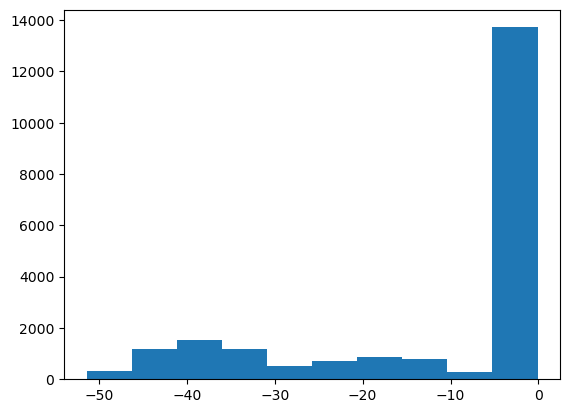

In [4]:
plt.hist(x=df[df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] < 0]['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'])

(array([1.3210000e+03, 2.7130000e+03, 1.1670000e+03, 1.7110000e+03,
        1.7060000e+03, 3.3887500e+05, 6.1331820e+06, 3.7475256e+07,
        2.1789265e+07, 6.4926900e+05]),
 array([-51.4 , -41.76, -32.12, -22.48, -12.84,  -3.2 ,   6.44,  16.08,
         25.72,  35.36,  45.  ]),
 <BarContainer object of 10 artists>)

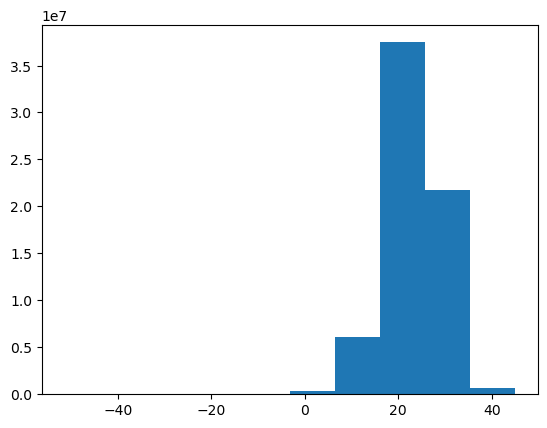

In [5]:
plt.hist(x=df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'])

In [30]:
df = df[df["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"] >= -15]

(array([ 340.,  204.,  120.,   48.,   54.,   98.,  286., 1109., 3390.,
        9044.]),
 array([-15.        , -13.51000023, -12.02000046, -10.52999973,
         -9.03999996,  -7.55000019,  -6.05999947,  -4.56999969,
         -3.07999992,  -1.59000015,  -0.1       ]),
 <BarContainer object of 10 artists>)

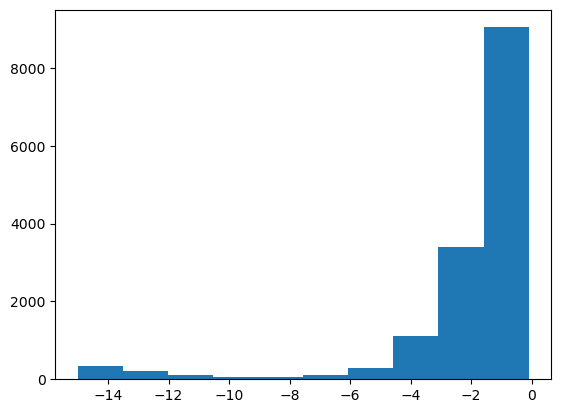

In [25]:
plt.hist(x=df[df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] < 0]['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'])

### TEMPERATURA DO PONTO DE ORVALHO (°C) 

O ponto de orvalho faz referência à temperatura em que o vapor de água gasosa começa a condensar na forma de orvalho ou geada.
O ponto de orvalho pode sim ter valores negativos "grandes", sendo menos comum mas ainda sim é possível. Como a proporção de valores negativos com relação ao total é apenas 0.27%, eles serão mantidos no dataset.

(array([4.10000e+01, 6.74000e+02, 3.88000e+03, 2.68100e+03, 1.58400e+03,
        1.66700e+03, 1.99100e+03, 6.89600e+03, 2.60310e+04, 1.34557e+05]),
 array([-42.5       , -38.25999832, -34.02000046, -29.77999878,
        -25.53999901, -21.29999924, -17.05999756, -12.81999779,
         -8.57999802,  -4.33999634,  -0.1       ]),
 <BarContainer object of 10 artists>)

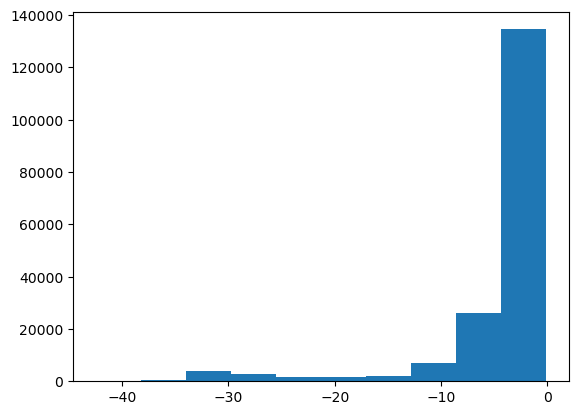

In [26]:
plt.hist(x=df[df['TEMPERATURA DO PONTO DE ORVALHO (°C)'] < 0]['TEMPERATURA DO PONTO DE ORVALHO (°C)'])

(array([8.7300000e+02, 6.6460000e+03, 3.3280000e+03, 1.2677000e+04,
        2.6719600e+05, 5.5616740e+06, 3.2367920e+07, 2.8132648e+07,
        3.3896000e+04, 1.1330000e+03]),
 array([-42.5 , -33.75, -25.  , -16.25,  -7.5 ,   1.25,  10.  ,  18.75,
         27.5 ,  36.25,  45.  ]),
 <BarContainer object of 10 artists>)

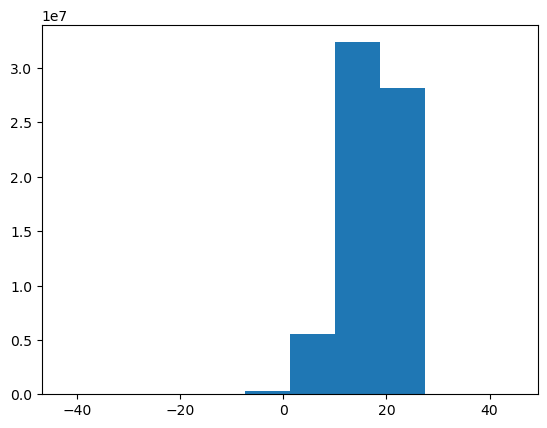

In [27]:
plt.hist(x=df['TEMPERATURA DO PONTO DE ORVALHO (°C)'])

### Umidade relativa do ar

Este campo deveria ter valores entre 0 e 100 visto que se trata de uma porcentagem relativa ao ar.

Como apenas 0.01% desses dados possuem valores inconsistentes, será feita a exclusão deles.

In [29]:
print(f"{'UMIDADE RELATIVA DO AR, HORARIA (%)'}: {((df['UMIDADE RELATIVA DO AR, HORARIA (%)'] > 100).sum()/df.shape[0] * 100):.2f}%")

UMIDADE RELATIVA DO AR, HORARIA (%): 0.01%


(array([6.6379293e+07, 1.0100000e+02, 3.3300000e+02, 4.0900000e+02,
        4.7200000e+02, 6.9300000e+02, 9.9000000e+02, 1.2800000e+03,
        1.8980000e+03, 2.5220000e+03]),
 array([  4.        , 102.59999847, 201.19999695, 299.79998779,
        398.3999939 , 497.        , 595.59997559, 694.20001221,
        792.79998779, 891.39996338, 990.        ]),
 <BarContainer object of 10 artists>)

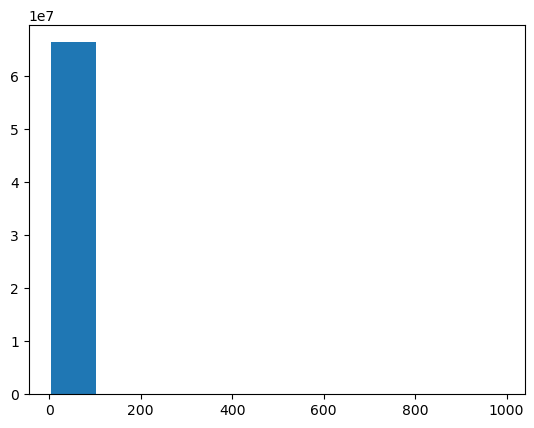

In [30]:
plt.hist(x=df['UMIDADE RELATIVA DO AR, HORARIA (%)'])

In [31]:
df = df[df["UMIDADE RELATIVA DO AR, HORARIA (%)"] <= 100]

### VENTO, VELOCIDADE HORARIA (m/s)

A velocidade do vento não apresenta nenhum valor exorbitante que necessite algum tipo de tratameto. Tendo _0 m/s_ como mínimo e aproximadamente _43 m/s_ como máximo. Por mais que seja um valor alto se compararmos com o padrão, é um valor que representa a realidade e como o objetivo do programa é realizar uma previsão do tempo, esses valores altos (mas não irreais) serão mantidos.

(array([6.0247477e+07, 5.8758350e+06, 2.2965700e+05, 2.2639000e+04,
        3.3070000e+03, 3.3100000e+02, 4.0000000e+01, 0.0000000e+00,
        6.0000000e+00, 1.0000000e+00]),
 array([ 0.        ,  4.34000015,  8.68000031, 13.02000046, 17.36000061,
        21.70000076, 26.04000092, 30.38000107, 34.72000122, 39.06000137,
        43.40000153]),
 <BarContainer object of 10 artists>)

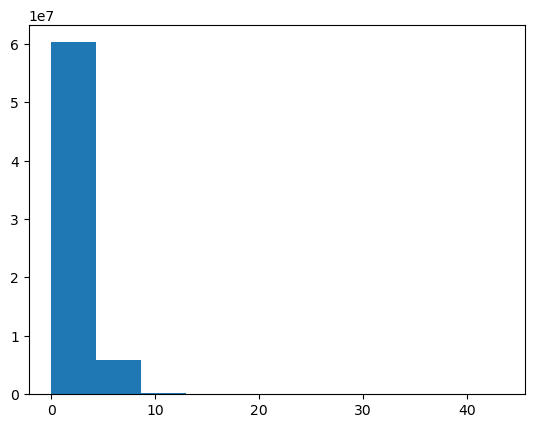

In [32]:
plt.hist(x=df['VENTO, VELOCIDADE HORARIA (m/s)'])

In [34]:
print(f"MIN: {df['VENTO, VELOCIDADE HORARIA (m/s)'].min()}\nMAX: {df['VENTO, VELOCIDADE HORARIA (m/s)'].max()}\nMEAN: {df['VENTO, VELOCIDADE HORARIA (m/s)'].mean()}")

MIN: 0.0
MAX: 43.400001525878906
MEAN: 2.0463671684265137


In [35]:
print(f"{'VENTO, VELOCIDADE HORARIA (m/s)'}: {((df['VENTO, VELOCIDADE HORARIA (m/s)'] < df['VENTO, VELOCIDADE HORARIA (m/s)'].mean()).sum()/df.shape[0] * 100):.2f}%")

VENTO, VELOCIDADE HORARIA (m/s): 56.98%


In [36]:
print(f"{'VENTO, VELOCIDADE HORARIA (m/s)'}: {((df['VENTO, VELOCIDADE HORARIA (m/s)'] == 0).sum()/df.shape[0] * 100):.2f}%")

VENTO, VELOCIDADE HORARIA (m/s): 10.44%


### RADIACAO GLOBAL (KJ/m²)

Como não foi encontrado nenhuma fonte indicando os valores normais para o a radiação global, será feito um filtro excluindo os valores acima e abaixo do desvio padrão. Lembrando que as linhas que possuem valor igual a 0 são aquelas que não possuem marcação, excluir elas acarretaria exlucir aproximadamente 44% do dataset.

A solução escolhida (pode mudar de acordo com o resultado do treinamento dos modelos) é excluir apenas os valores acima do desvio padrão. Caso o referido campo se mostre irrelevante ou prejudicial para o modelo, ele será removido.

Inicialmente será utilizada a regra empírica para identificar e excluir os valores desviados.

In [26]:
print(f"Min: {df['RADIACAO GLOBAL (KJ/m²)'].min()}")
print(f"Max: {df['RADIACAO GLOBAL (KJ/m²)'].max()}")
print(f"Mean: {df[df['RADIACAO GLOBAL (KJ/m²)']!=0]['RADIACAO GLOBAL (KJ/m²)'].mean()}")

Min: 0.0
Max: 51588.0
Mean: 1532.896036229097


(array([3.6463698e+07, 4.3015000e+04, 3.4419000e+04, 3.5825000e+04,
        3.4986000e+04, 3.4495000e+04, 2.9428000e+04, 1.9128000e+04,
        9.0710000e+03, 3.5200000e+02]),
 array([1.000000e-01, 5.158890e+03, 1.031768e+04, 1.547647e+04,
        2.063526e+04, 2.579405e+04, 3.095284e+04, 3.611163e+04,
        4.127042e+04, 4.642921e+04, 5.158800e+04]),
 <BarContainer object of 10 artists>)

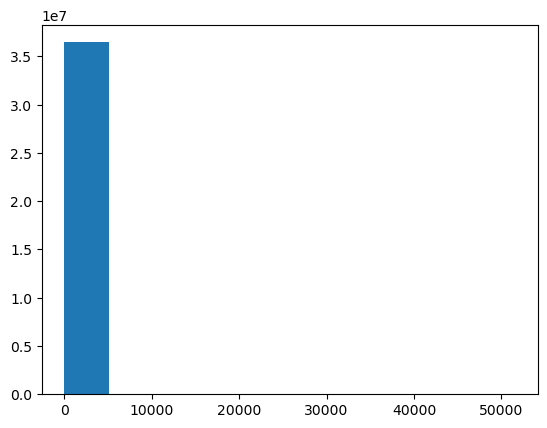

In [40]:
plt.hist(x=df[df["RADIACAO GLOBAL (KJ/m²)"] != 0]["RADIACAO GLOBAL (KJ/m²)"])

In [18]:
print(f"Count 0: {(len(df[df['RADIACAO GLOBAL (KJ/m²)'] == 0]['RADIACAO GLOBAL (KJ/m²)'])/len(df['RADIACAO GLOBAL (KJ/m²)']) * 100):.2f} %")


Count 0: 44.71 %


In [24]:
print(f"Count 0: {((len(df[df['RADIACAO GLOBAL (KJ/m²)'] > df['RADIACAO GLOBAL (KJ/m²)'].mean()])/len(df['RADIACAO GLOBAL (KJ/m²)'])) * 100):.2f} %")


Count 0: 33.20 %


In [3]:
mean = df[df['RADIACAO GLOBAL (KJ/m²)'] != 0]['RADIACAO GLOBAL (KJ/m²)'].mean()
desvio_padrao = df[df['RADIACAO GLOBAL (KJ/m²)'] != 0]['RADIACAO GLOBAL (KJ/m²)'].std()

limite_inferior = mean - 3 * desvio_padrao
limite_superior = mean + 3 * desvio_padrao
print(f"Limite Inferior: {limite_inferior}\nLimite Superior: {limite_superior}")


Limite Inferior: -5036.985183270351
LimiteSuperior: 8103.560715996376


In [4]:
df = df[(df['RADIACAO GLOBAL (KJ/m²)'] < limite_superior)]


In [5]:
print(f"Min: {df['RADIACAO GLOBAL (KJ/m²)'].min()}")
print(f"Max: {df['RADIACAO GLOBAL (KJ/m²)'].max()}")
print(f"Mean: {df[df['RADIACAO GLOBAL (KJ/m²)']!=0]['RADIACAO GLOBAL (KJ/m²)'].mean()}")

Min: 0.0
Max: 8103.0
Mean: 1400.5576387966241


### PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)

https://fisica.ufpr.br/grimm/aposmeteo/cap4/cap4-6.html#:~:text=Usa%2Dse%20ainda%20a%20uni,970%20mb%20at%C3%A9%201050%20mb.

Segundo site da UFPR, a medida usual esta situada entre _970 mb_ e _1050 mb_.

In [6]:
print(f"Min: {df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].min()}")
print(f"Max: {df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].max()}")
print(f"Mean: {df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].mean()}")

Min: 720.1
Max: 1050.0
Mean: 964.6737238868848


(array([9.3550000e+03, 2.3640000e+04, 3.4823000e+04, 5.4790000e+05,
        1.3757000e+06, 6.6153670e+06, 1.2839540e+07, 2.0625171e+07,
        2.2617153e+07, 1.4903190e+06]),
 array([ 720.1 ,  753.09,  786.08,  819.07,  852.06,  885.05,  918.04,
         951.03,  984.02, 1017.01, 1050.  ]),
 <BarContainer object of 10 artists>)

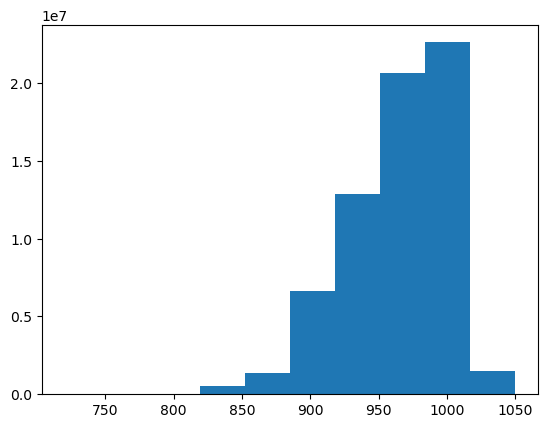

In [13]:
plt.hist(x=df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'])

In [10]:
print(f"Valores dentro do intervalo usual segundo a UFPR(%): {len(df[(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] > 970) & (df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] < 1050)])/len(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']) * 100} %")

Valores dentro do intervalo usual segundo a UFPR(%): 48.99781755436259 %


In [11]:
mean = df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].mean()
desvio_padrao = df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].std()

limite_inferior = mean - 3 * desvio_padrao
limite_superior = mean + 3 * desvio_padrao

print(f"Limite Inferior: {limite_inferior}\nLimite Superior: {limite_superior}")

Limite Inferior: 850.2888192553207
Limite Superior: 1079.0586285184488


In [12]:
print(f"Valores dentro do interval definido pela regra empirica - limite 3(%): {len(df[(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] > limite_inferior) & (df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] < limite_superior)])/len(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']) * 100} %")

Valores dentro do interval definido pela regra empirica(%): 99.11715758396232 %


In [14]:
mean = df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].mean()
desvio_padrao = df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].std()

limite_inferior = mean - 2 * desvio_padrao
limite_superior = mean + 2 * desvio_padrao

print(f"Limite Inferior: {limite_inferior}\nLimite Superior: {limite_superior}")

Limite Inferior: 888.4171207991754
Limite Superior: 1040.9303269745942


In [15]:
print(f"Valores dentro do interval definido pela regra empirica - limite 3(%): {len(df[(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] > limite_inferior) & (df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] < limite_superior)])/len(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']) * 100} %")

Valores dentro do interval definido pela regra empirica - limite 3(%): 96.53294986407161 %


Ao utilizar as medidas apresentadas pela UFPR seriam exlcuidas aproximadamente 50% do dataset, dessa forma será utilizado o mesmo recurso de avaliação usado para medir os outliers na radiação global.

Ao compararmos os limites da regra empirica aos limites 3 e 2, percebemos que não há um grande desvio da média. Dessa forma, utilizaremos o limite 2 pois se aproxima mais do valor imposto pela UFPR.

In [16]:
df = df[(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] > limite_inferior) & (df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'] < limite_superior)]


### PRECIPITAÇÃO TOTAL, HORÁRIO (mm)

https://g1.globo.com/sp/santos-regiao/noticia/2024/05/18/vitimas-de-cidade-atingida-por-volume-de-chuva-recorde-no-pais-relembram-a-tragedia-confira-o-ranking-historico.ghtml

Como não os valores máximo e minimo não fogem da realidade, não será feito tratamento nos dados de precipitação. No artigo acima, feito pelo G1, mostra um ranking histórico dos níveis de precipitação em território brasileiro

In [17]:
print(f"Min: {df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].min()}")
print(f"Max: {df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].max()}")
print(f"Mean: {df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].mean()}")

Min: 0.0
Max: 138.2
Mean: 0.2114769520012323


(array([6.3765689e+07, 9.5187000e+04, 1.8296000e+04, 4.1100000e+03,
        9.3500000e+02, 2.3400000e+02, 5.0000000e+01, 6.0000000e+00,
        1.0000000e+00, 2.0000000e+00]),
 array([  0.  ,  13.82,  27.64,  41.46,  55.28,  69.1 ,  82.92,  96.74,
        110.56, 124.38, 138.2 ]),
 <BarContainer object of 10 artists>)

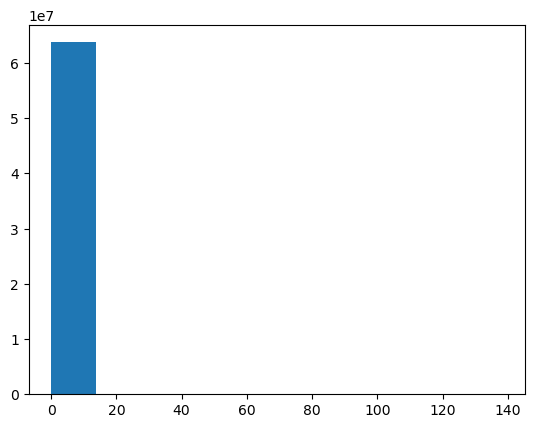

In [18]:
plt.hist(x=df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])

(array([7.7806e+04, 1.7727e+04, 4.7690e+03, 1.2010e+03, 3.6900e+02,
        1.0300e+02, 1.8000e+01, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 15.2,  27.5,  39.8,  52.1,  64.4,  76.7,  89. , 101.3, 113.6,
        125.9, 138.2]),
 <BarContainer object of 10 artists>)

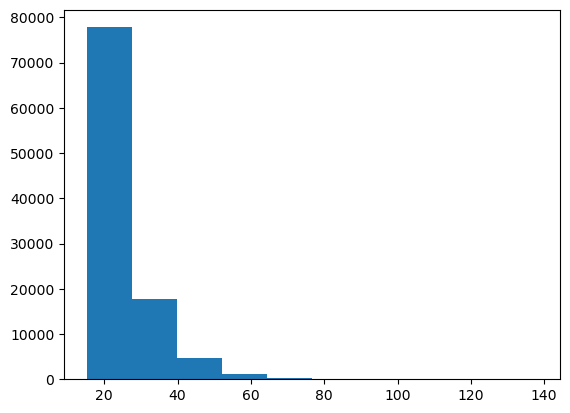

In [19]:
plt.hist(x=df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >15]['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])

# Reanálise com os dados tratados

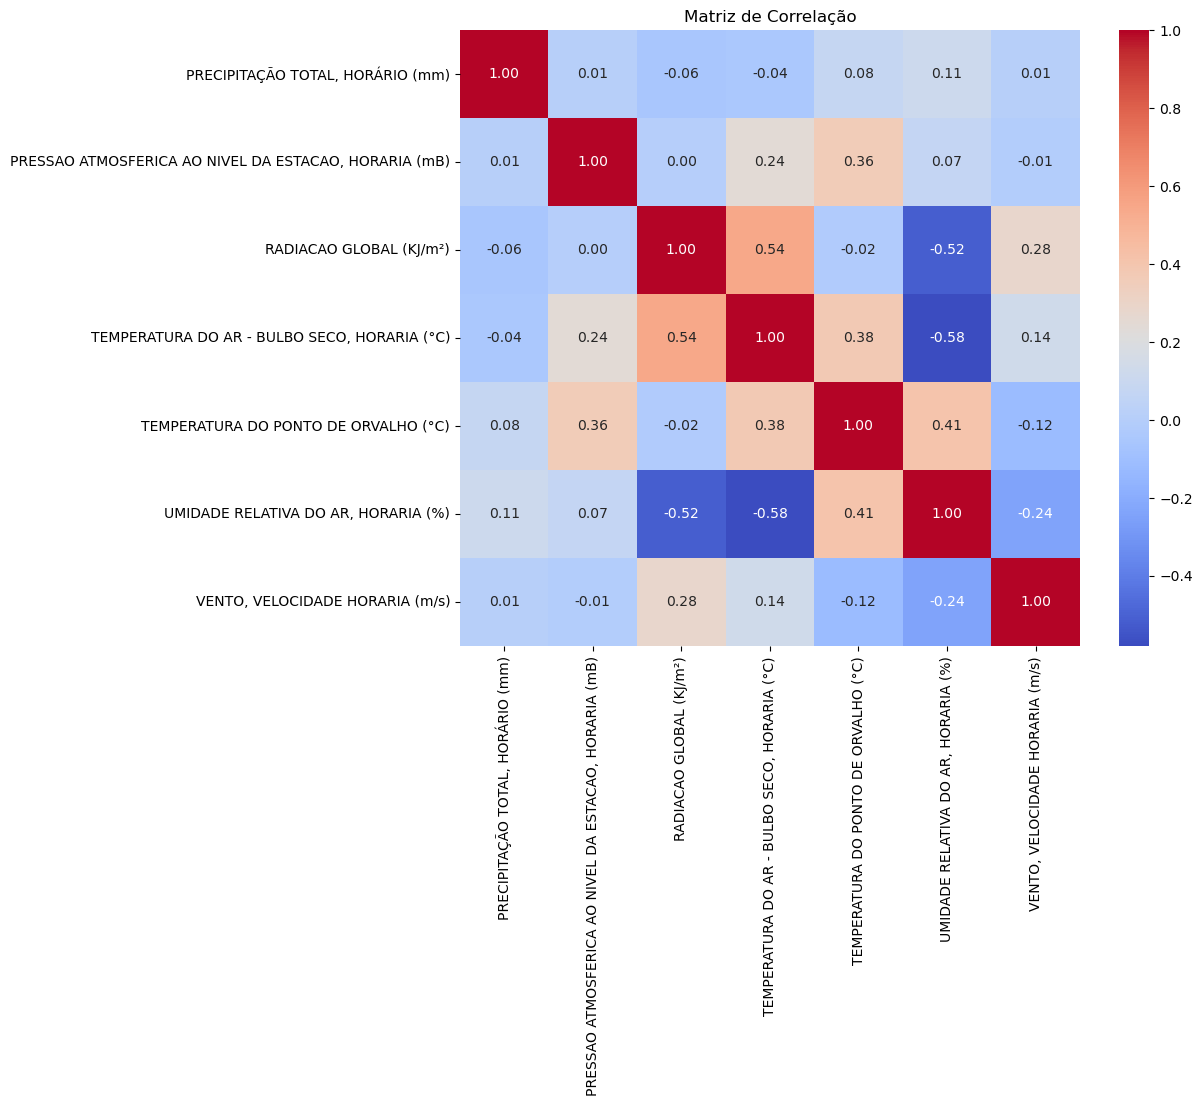

In [4]:
# Calcular correlação de Pearson
correlacao = df.corr()

# Exibir matriz de correlaçoã como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [5]:
df.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
count,6.388451e+07,6.388451e+07,6.388451e+07,6.388451e+07,6.388451e+07,6.388451e+07,6.388451e+07
mean,2.114770e-01,9.682570e+02,7.747691e+02,2.364237e+01,1.725063e+01,7.124879e+01,2.014551e+00
std,1.310534e+00,3.336538e+01,1.087354e+03,5.548358e+00,4.702304e+00,2.160848e+01,1.635529e+00
min,0.000000e+00,8.885000e+02,0.000000e+00,-9.800000e+00,-1.580000e+01,7.000000e+00,0.000000e+00
25%,0.000000e+00,9.436000e+02,0.000000e+00,2.030000e+01,1.450000e+01,5.800000e+01,8.000000e-01
50%,0.000000e+00,9.709000e+02,4.090000e+01,2.370000e+01,1.800000e+01,7.400000e+01,1.800000e+00
75%,0.000000e+00,9.974000e+02,1.458900e+03,2.730000e+01,2.080000e+01,8.800000e+01,2.900000e+00
max,1.382000e+02,1.040900e+03,8.103000e+03,4.500000e+01,4.500000e+01,9.900000e+02,3.830000e+01


# Salvando os dados

In [ ]:
df.to_csv("./output/results/raw_df.csv", index=False)

In [16]:
step_1_df = df.copy()
step_1_df.to_csv("./output/results/step_1_df.csv", index=False)
step_1_df = 0

In [24]:
step_2_df = df.copy()
step_2_df.to_csv("./output/results/step_2_df.csv", index=False)
step_2_df = 0

In [31]:
step_3_df = df.copy()
step_3_df.to_csv("./output/results/step_3_df.csv", index=False)
step_3_df = 0

In [33]:
step_4_df = df.copy()
step_4_df.to_csv("./output/results/step_4_df.csv", index=False)
step_4_df = 0

In [20]:
step_5_df = df.copy()
step_5_df.to_csv("./output/results/step_5_df.csv", index=False)
step_5_df = 0

# Carregando dados

Parte do código utilizada como suporte no desenvolvimento, usada apenas para carregar os dados disponíveis a parte de certo ponto das transformações

In [2]:
df = pd.read_csv("./output/results/raw_df.csv")

In [ ]:
df = pd.read_csv("./output/results/step_1_df.csv")

In [ ]:
df = pd.read_csv("./output/results/step_2_df.csv")

In [ ]:
df = pd.read_csv("./output/results/step_3_df.csv")

In [2]:
df = pd.read_csv("./output/results/step_4_df.csv")

In [3]:
df = pd.read_csv("./output/results/step_5_df.csv")

# Deletando variáveis da memória

Parte do código voltada para a exclusão de variáveis da memória, este controle foi feito visualmente pela interface de variáveis do Jupyter. Este código não deve ser considerado visto que serve apenas de suporte na hora do desenvolvimento

In [83]:
del data_path
del age
del age_size
del age_size_list
del ages_list
del col
del columns
del columns_to_fill
del df_negative
del file
del files
del filtered_null_df
del IQR
del mean
del mean_pos_ponto_or8888888valho
del mean_pos_precipitacao
del mean_pos_pressao
del mean_pos_temperatura_bulbo
del mean_pos_umidade
del mean_pos_vento
del outliers
del Q1
del Q3
del read_size
del required_columns
del size
del std
del step_2_df
del step_3_df
del step_4_df
del total_size

gc.collect()


NameError: name 'age' is not defined